ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)
1. Compute the Median and IQR. Show your working clearly.

Answer  :    

[30, 31, 32, 32, 33, 33, 34, 34, 35, 500]

Median :     

Q2 = (33 + 33) / 2 = 33

Quartiles:

Q1 (25%) -> [30, 31, 32, 32, 33] -> 32

Q3 (75%) ->  [34, 34, 35, 500] -> (34 + 35)/2 = 34.5

IQR = Q3 - Q1 = 34.5 - 32 = 2.5

 Median = 33, IQR = 2.5


#### Q1 Answer (Student)
2. Use the IQR rule to check if 500 is an outlier. Show your steps and the fences.

Answer  :     

Lower_Fence = Q1 − 1.5×IQR = 32 − 1.5×2.5 = 32 − 3.75 = 28.25​

Upper_Fence = Q3 + 1.5×IQR = 34.5 + 1.5×2.5 = 34.5 + 3.75 = 38.25

 500 > 38.25 →  500 is an OUTLIER.

#### Q1 Answer (Student)
3. Explain in 3–5 sentences why median + IQR may be better than mean + standard deviation for this dataset.

Answer  :     

The median​ and IQR​ are robust to outliers.The median​ is robust to outliers and represents the middle value of the dataset. The IQR​ measures the spread of the middle 50% of the data and is also unaffected by extreme values.

In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

1.

(P(D)) = 1% = 0.01
(P(T+| D)) =  90% = 0.9
(P(T− | No D)) = 92% = 0.9
P(T+ | No D) = 8% = 0.08

PPV = P(D | T+) = 0.102 or 10.2%


2.

20% (P(D) = 0.2)

This means the chance that a positive test result actually indicates the disease goes up. This means that when someone tests positive, so PPV increases with higher prevalence.


### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)
1.
Binary Classification​ – Predicting whether a user is premium (1) or not (0)

2.


*   Handle missing values
*   Encode categorical variable region
*   Normalize/Scale numeric features
*   in target premium_user


3.  


The pipeline starts  raw dataset for missing or invalid values. Missing numeric values  can be imputed using median or mean,  categorical missing values in region could be filled with the mode .The categorical variable region​ is encoded using one-hot encoding . Numeric features such as age​ and daily_clicks​ are  scaled using methods like RobustScaler​ . The target variable is  premium_user​ . The dataset is then split into training and testing sets . After training, the model is evaluated on the test set using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. the model's performance is analyzed, and potential improvements like hyperparameter tuning or feature engineering are considered.






---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


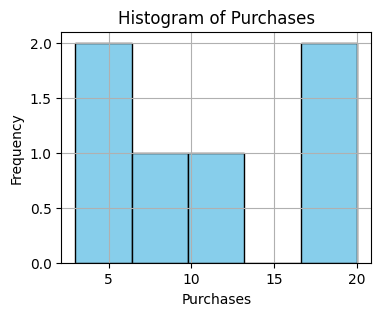

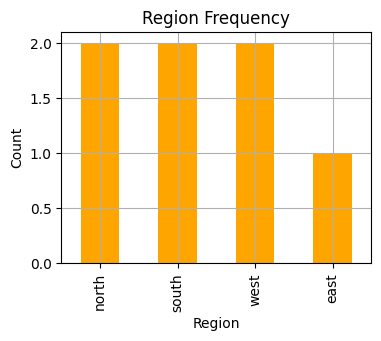

In [ ]:
# Q4 – Student Answer : 01

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

df.isnull().sum()
df.nunique()
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()



plt.figure(figsize=(4,3))
plt.hist(df['purchases'].dropna(), bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram of Purchases")
plt.xlabel("Purchases")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(4,3))
df['region'].value_counts().plot(kind='bar', color='orange')
plt.title("Region Frequency")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()



_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

In [ ]:
# Q4 – Student Answer :  02

df['age'] = df['age'].fillna(df['age'].median())
df['purchases'] = df['purchases'].fillna(df['purchases'].median())

encoder = OneHotEncoder(drop='first')
region_encoded = encoder.fit_transform(df[['region']])
region_cols = encoder.get_feature_names_out(['region'])
region_df = pd.DataFrame(region_encoded.toarray(), columns=region_cols)

numeric_features = ['age', 'purchases']
scaler = RobustScaler()
scaled_numeric = scaler.fit_transform(df[numeric_features])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features)

final_df = pd.concat([scaled_numeric_df, region_df, df[['premium_user']]], axis=1)

print(final_df.head())



   age  purchases  region_north  region_south  region_west  premium_user
0 -0.5  -0.928571           1.0           0.0          0.0             0
1  0.0   0.071429           0.0           1.0          0.0             1
2  0.0  -0.642857           1.0           0.0          0.0             0
3 -0.8   0.000000           0.0           0.0          0.0             0
4  1.5   1.500000           0.0           0.0          1.0             1


In [ ]:
# Q4 – Student Answer : 03

median_purchase = df['purchases'].median()
df['high_spender'] = (df['purchases'] > median_purchase).astype(int)

final_df['high_spender'] = (df['purchases'] > median_purchase).astype(int)



In [ ]:
# Q4 – Student Answer : 04
print(final_df.head())

   age  purchases  region_north  region_south  region_west  premium_user  \
0 -0.5  -0.928571           1.0           0.0          0.0             0   
1  0.0   0.071429           0.0           1.0          0.0             1   
2  0.0  -0.642857           1.0           0.0          0.0             0   
3 -0.8   0.000000           0.0           0.0          0.0             0   
4  1.5   1.500000           0.0           0.0          1.0             1   

   high_spender  
0             0  
1             1  
2             0  
3             0  
4             1  


---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [ ]:
# Q5 – Student Answer : 01

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


In [ ]:
# Q5 – Student Answer : 02


X = df2[['area_sqft', 'bedrooms']]
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Q5 – Student Answer : 03


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Q5 – Student Answer : 04

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Predictions:", model.predict(X_test))

Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]
Predictions: [100.         130.76923077]


In [ ]:
# Q5 – Student Answer : 05
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 19.615384615384613
RMSE: 19.61915499208746
R2: -0.7107166337935567


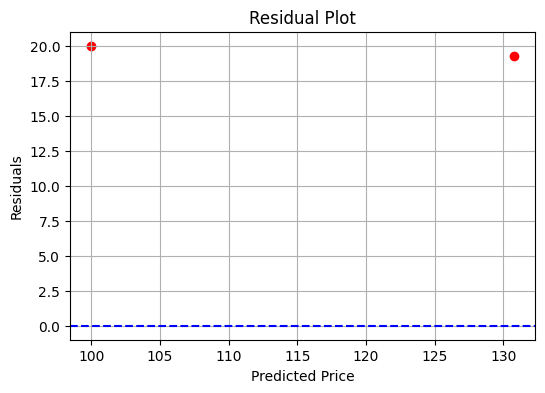

In [ ]:
# Q5 – Student Answer : 06

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer : 01

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

pred_05 = (y_prob >= 0.5).astype(int)


cm_05 = confusion_matrix(y_true, pred_05)
print("Confusion Matrix (0.5):\n", cm_05)

precision_05 = precision_score(y_true, pred_05)
recall_05 = recall_score(y_true, pred_05)
f1_05 = f1_score(y_true, pred_05)

print("Precision:", precision_05)
print("Recall:", recall_05)
print("F1 Score:", f1_05)

Confusion Matrix (0.5):
 [[5 0]
 [0 5]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
# Q6 – Student Answer : 02

pred_03 = (y_prob >= 0.3).astype(int)
cm_03 = confusion_matrix(y_true, pred_03)
print("\nConfusion Matrix (0.3):\n", cm_03)

precision_03 = precision_score(y_true, pred_03)
recall_03 = recall_score(y_true, pred_03)
f1_03 = f1_score(y_true, pred_03)

print("Precision:", precision_03)
print("Recall:", recall_03)
print("F1 Score:", f1_03)


Confusion Matrix (0.3):
 [[3 2]
 [0 5]]
Precision: 0.7142857142857143
Recall: 1.0
F1 Score: 0.8333333333333334


# Q6 – Student Answer : 03

Lowering threshold from 0.5 → 0.3 causes more predictions to be positive → Recall increases​ (more actual positives detected) but Precision drops​ (more false positives). This is because a lower threshold makes the model more sensitive, at the cost of labeling more negatives as positives incorrectly.

*Part 2: ROC and AUC (6 marks)*

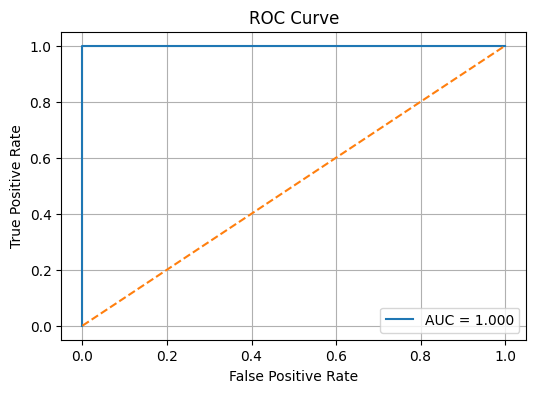

AUC: 1.0


In [ ]:
# Part 2: ROC and AUC  : 01

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_true, y_prob)
auc = roc_auc_score(y_true, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC:", round(auc, 3))

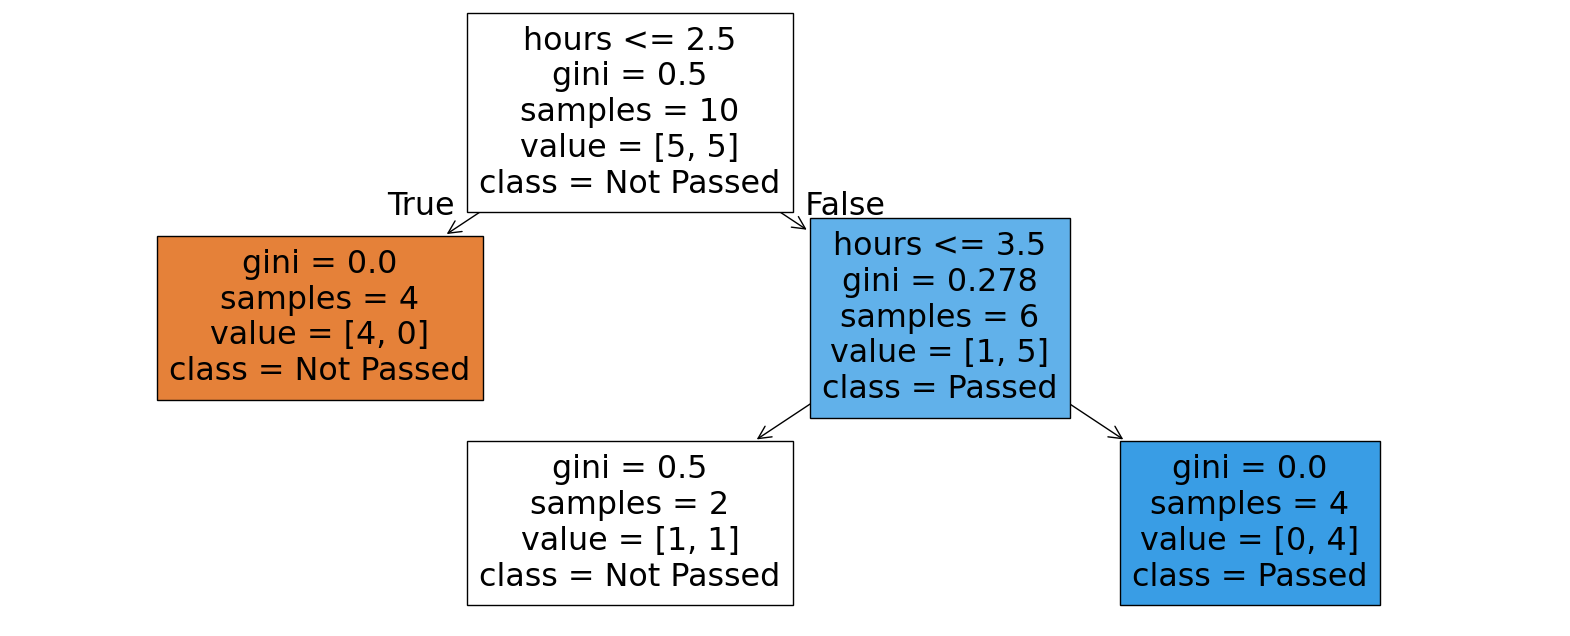

In [ ]:
# Part 2: ROC and AUC  : 01



df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

X_tree = df3[['hours']]
y_tree = df3['passed']

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_tree, y_tree)

plt.figure(figsize=(20,8))
plot_tree(tree, filled=True, feature_names=['hours'], class_names=['Not Passed', 'Passed'])
plt.show()


# Part 2: ROC and AUC  : 03

Tree depth is limited → helps avoid overfitting

On such a tiny dataset, it might still overfit slightly, but depth restriction is a good safeguard

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._